# Loading The Data

In [1]:
# Adding Essential Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Storing the Paths
customersFilePath = 'Datasets/Customers.csv'
productsFilePath = 'Datasets/Products.csv'
transactionsFilePath = 'Datasets/Transactions.csv'

In [10]:
# Loading the DataSets into DataFrames
customerDataFrame = pd.read_csv(customersFilePath)
productsDataFrame = pd.read_csv(productsFilePath)
transactionsDataFrame = pd.read_csv(transactionsFilePath)

In [16]:
# Display first few rows of each dataframe
print("Customers DataFrame:")
print(customerDataFrame.head(), "\n")

print("Products DataFrame:")
print(productsDataFrame.head(), "\n")

print("Transactions DataFrame:")
print(transactionsDataFrame.head(), "\n")

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T

## Data Cleaning

### Basic Info About Each Data Set 

In [18]:
# Check basic info for customer
print("Customers Info:\n", customerDataFrame.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Info:
 None 



In [21]:
# Check basic info for products
print("Products Info:\n", productsDataFrame.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Info:
 None 



In [22]:
# Check basic info for transactions
print("Transactions Info:\n", transactionsDataFrame.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
Transactions Info:
 None 



### Checking Missing Values For Each Dataset

In [30]:
# Finding Missing Values
def countMissingValues(inputDataFrame):
    return inputDataFrame.isnull().sum() + (inputDataFrame.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()

In [31]:
# Missing Value for Customer Dataset
print(f"The Missing Value for Customers Dataset")
print(countMissingValues(customerDataFrame))

The Missing Value for Customers Dataset
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


C:\Users\TUF F15\AppData\Local\Temp\ipykernel_24032\2715478578.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return inputDataFrame.isnull().sum() + (inputDataFrame.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()


In [32]:
# Missing Value for products Data 
print(f"The Missing Value for Products Dataset")
print(countMissingValues(productsDataFrame))

The Missing Value for Products Dataset
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


C:\Users\TUF F15\AppData\Local\Temp\ipykernel_24032\2715478578.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return inputDataFrame.isnull().sum() + (inputDataFrame.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()


In [77]:
# Missing Value for Transction Data
print(f"The Missing Value for Transection Dataset")
print(countMissingValues(transactionsDataFrame))

The Missing Value for Transection Dataset
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


C:\Users\TUF F15\AppData\Local\Temp\ipykernel_24032\2715478578.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return inputDataFrame.isnull().sum() + (inputDataFrame.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()


## Key Takeaways from Basic Data Exploration
1. Customers Dataset: No missing values, but SignupDate should be converted to datetime.<br>
2. Products Dataset: Price is correctly stored as float, but needs validation for extreme values.<br>
3. Transactions Dataset: TransactionDate should be converted to datetime, and TotalValue needs validation (Quantity × Price).<br>

### Data Cleaning

In [78]:
# Convert date columns to datetime format
customerDataFrame['SignupDate'] = pd.to_datetime(customerDataFrame['SignupDate'])
transactionsDataFrame['TransactionDate'] = pd.to_datetime(transactionsDataFrame['TransactionDate'])

In [79]:
customerDataFrame.head(2)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13


In [80]:
transactionsDataFrame.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68


In [81]:
### Removing Duplicates if there 
customerDataFrame.drop_duplicates(inplace=True)
productsDataFrame.drop_duplicates(inplace=True)
transactionsDataFrame.drop_duplicates(inplace=True)

## Plot distributions

In [82]:
# Function to plot distributions
def plotDistribution(df, column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

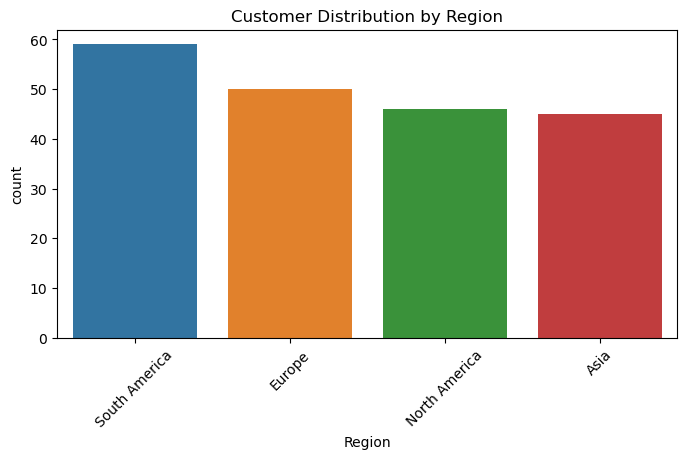

In [83]:
# Customer Region Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="Region", data=customerDataFrame, order=customerDataFrame["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


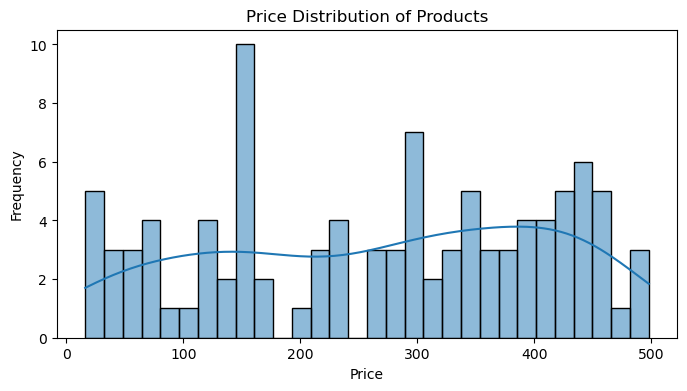

In [84]:
plotDistribution(productsDataFrame, "Price", "Price Distribution of Products")

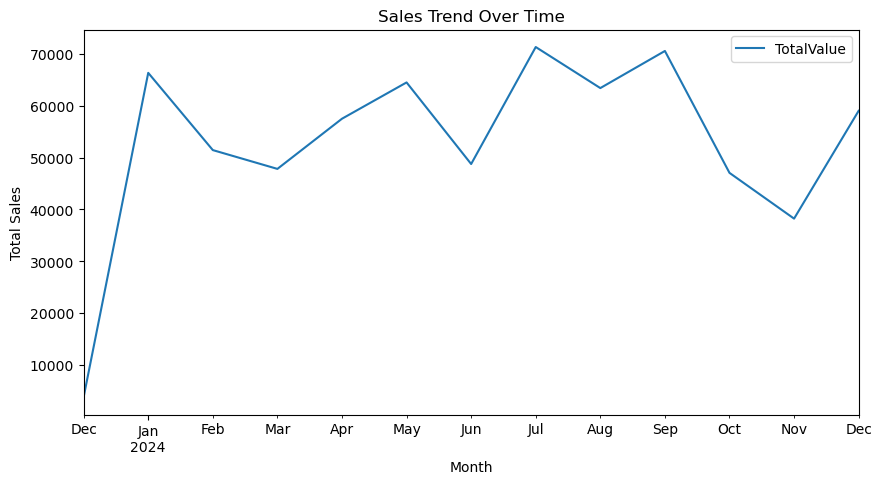

In [85]:
transactionsDataFrame["TransactionDate"] = pd.to_datetime(transactionsDataFrame["TransactionDate"], errors='coerce')
sales_trend = transactionsDataFrame.groupby(transactionsDataFrame["TransactionDate"].dt.to_period("M")).agg({"TotalValue": "sum"})
sales_trend.plot(kind="line", figsize=(10, 5), title="Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Advance EDA

In [86]:
# Merge datasets
merged_df = transactionsDataFrame.merge(customerDataFrame, on="CustomerID").merge(productsDataFrame, on="ProductID")

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


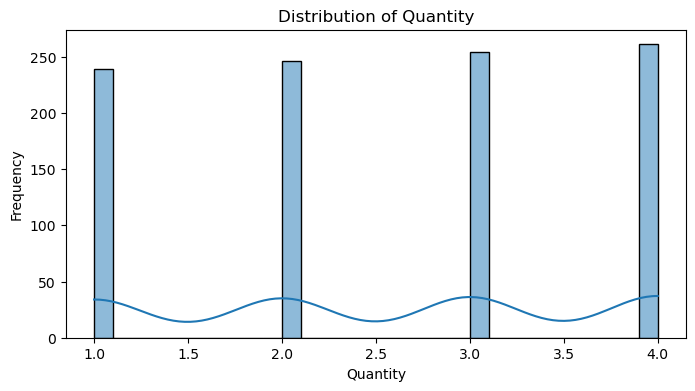

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


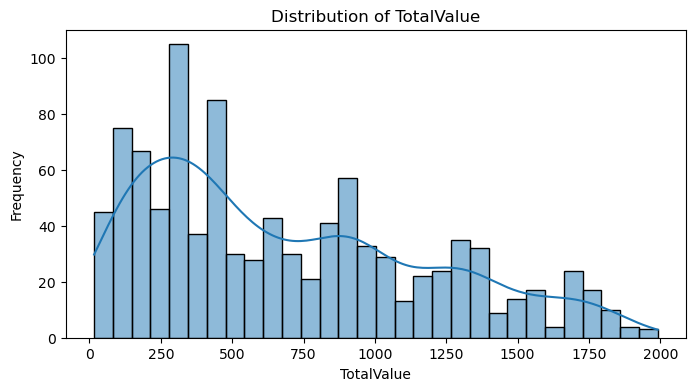

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


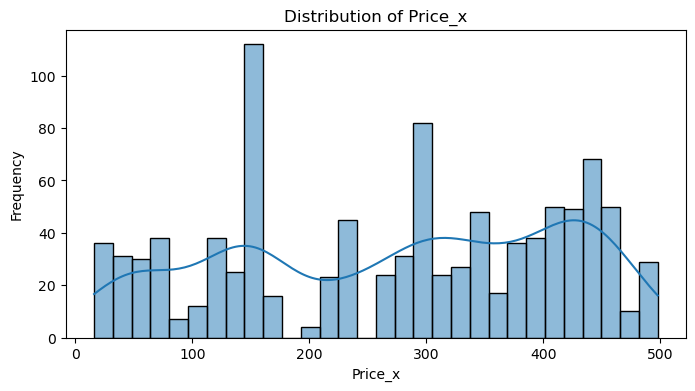

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


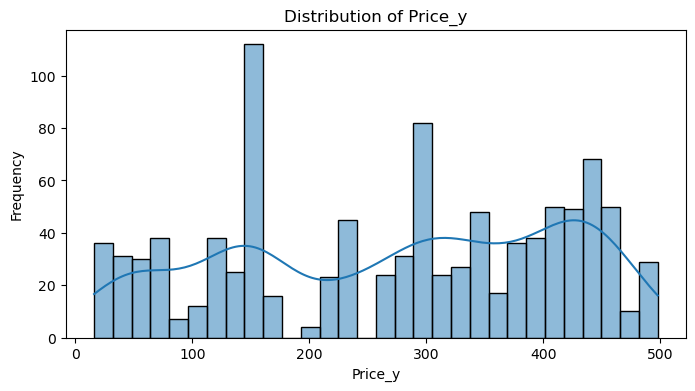

In [70]:
# Distribution of numerical features
numerical_cols = merged_df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plotDistribution(merged_df, col, f"Distribution of {col}")

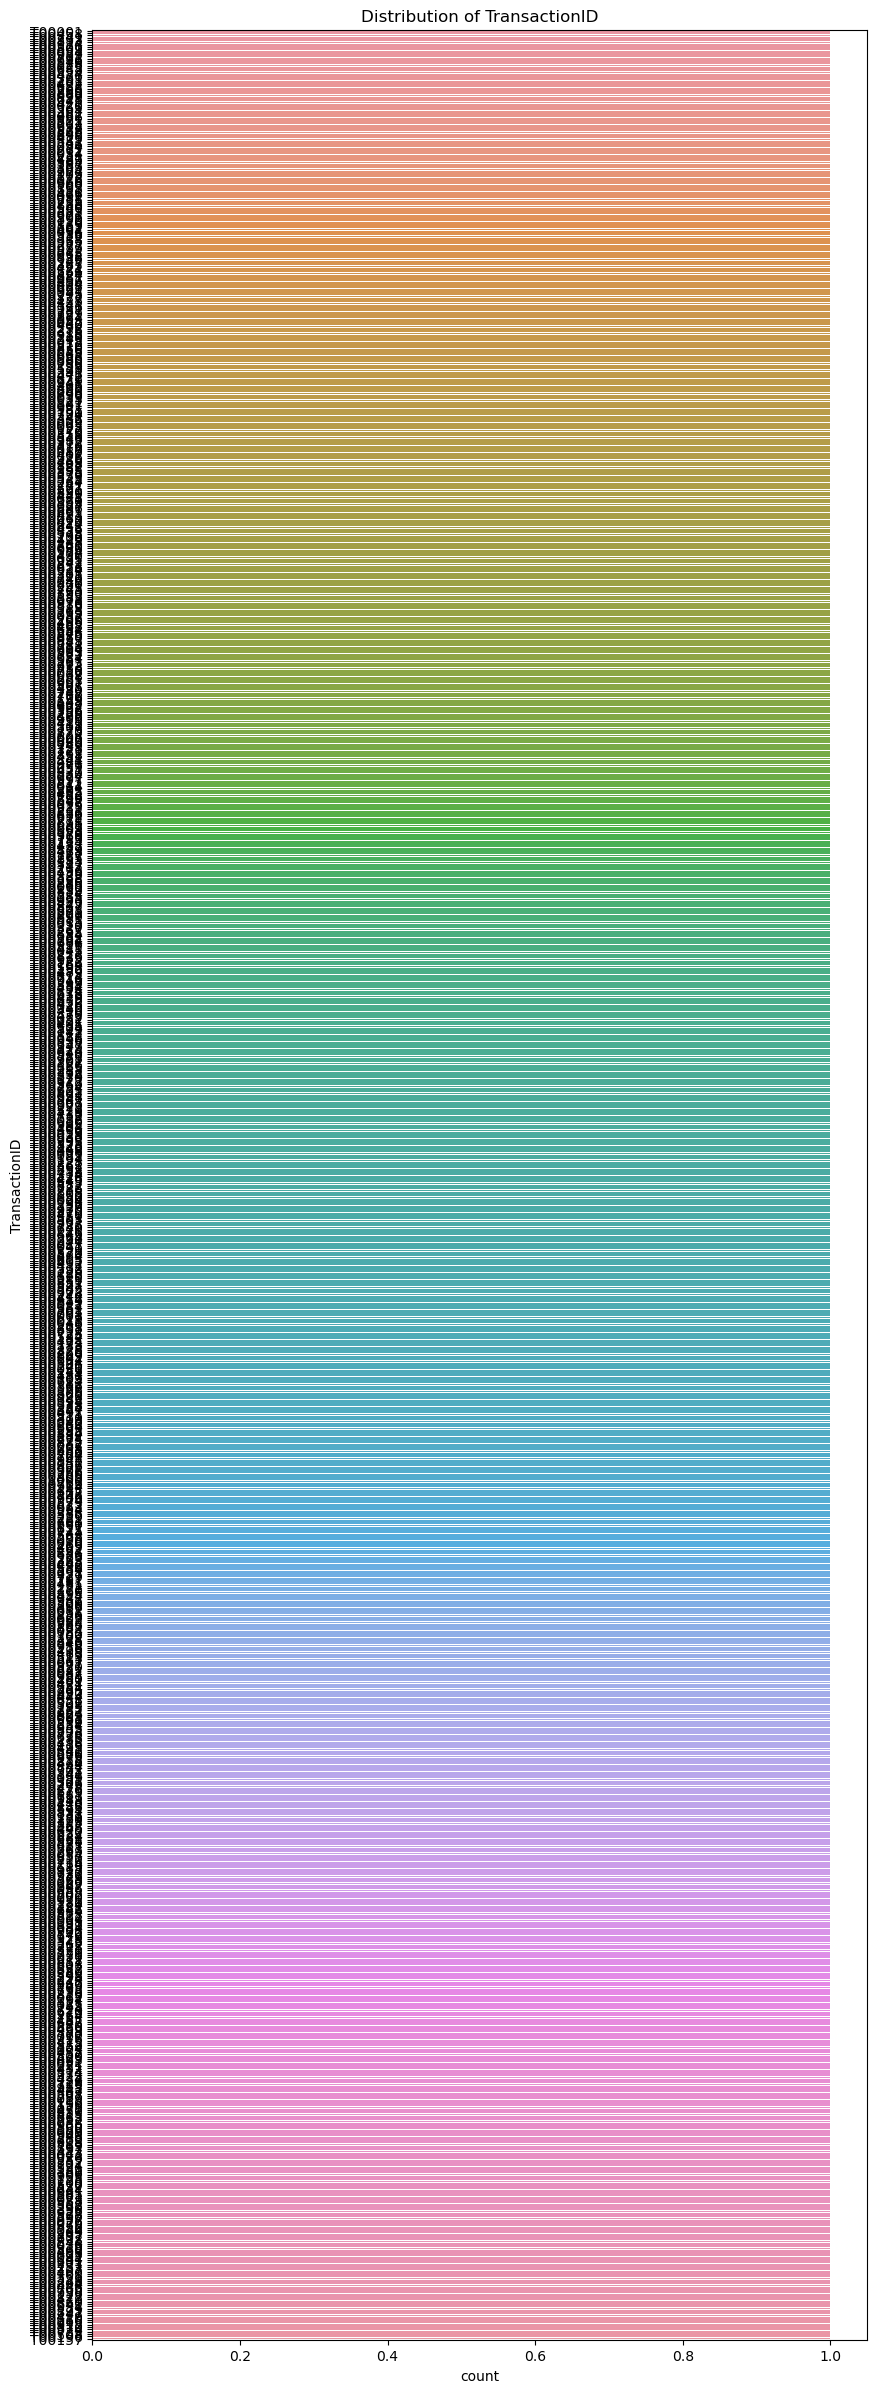

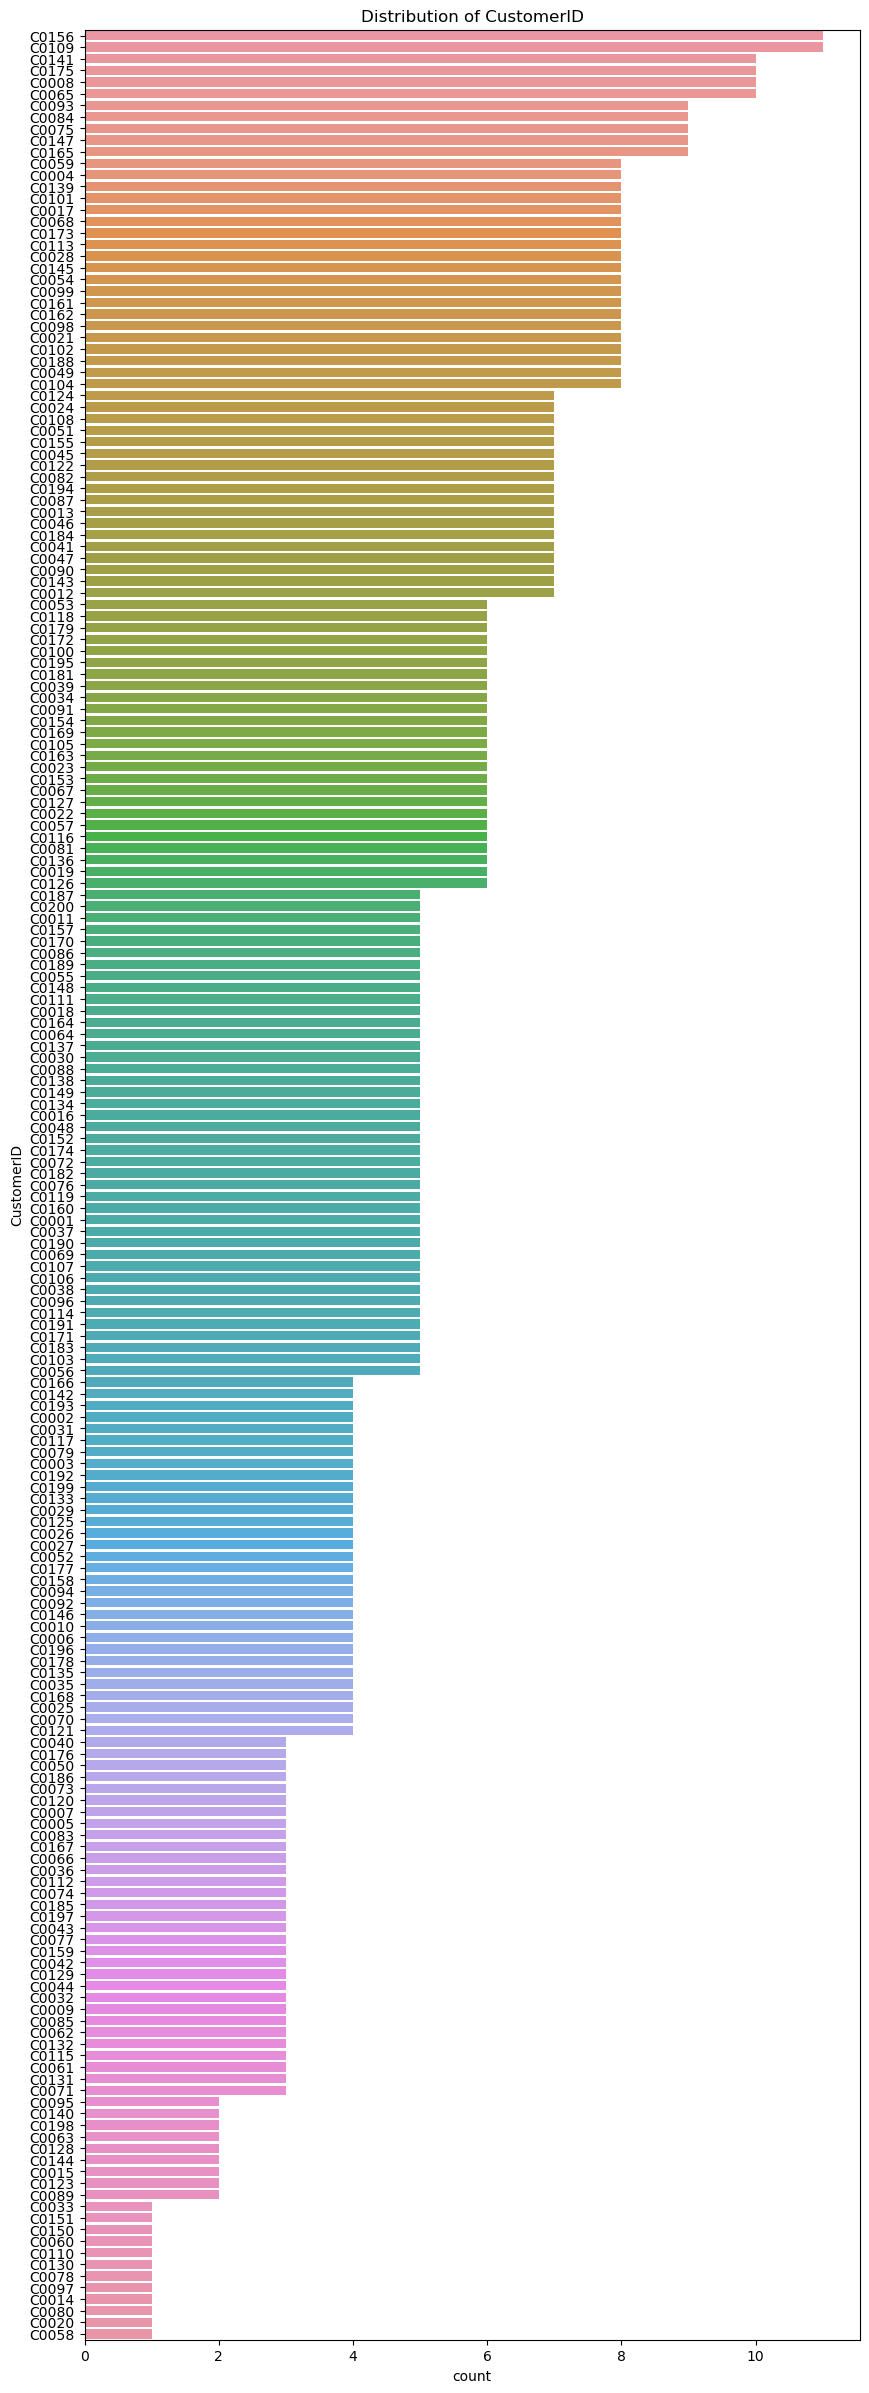

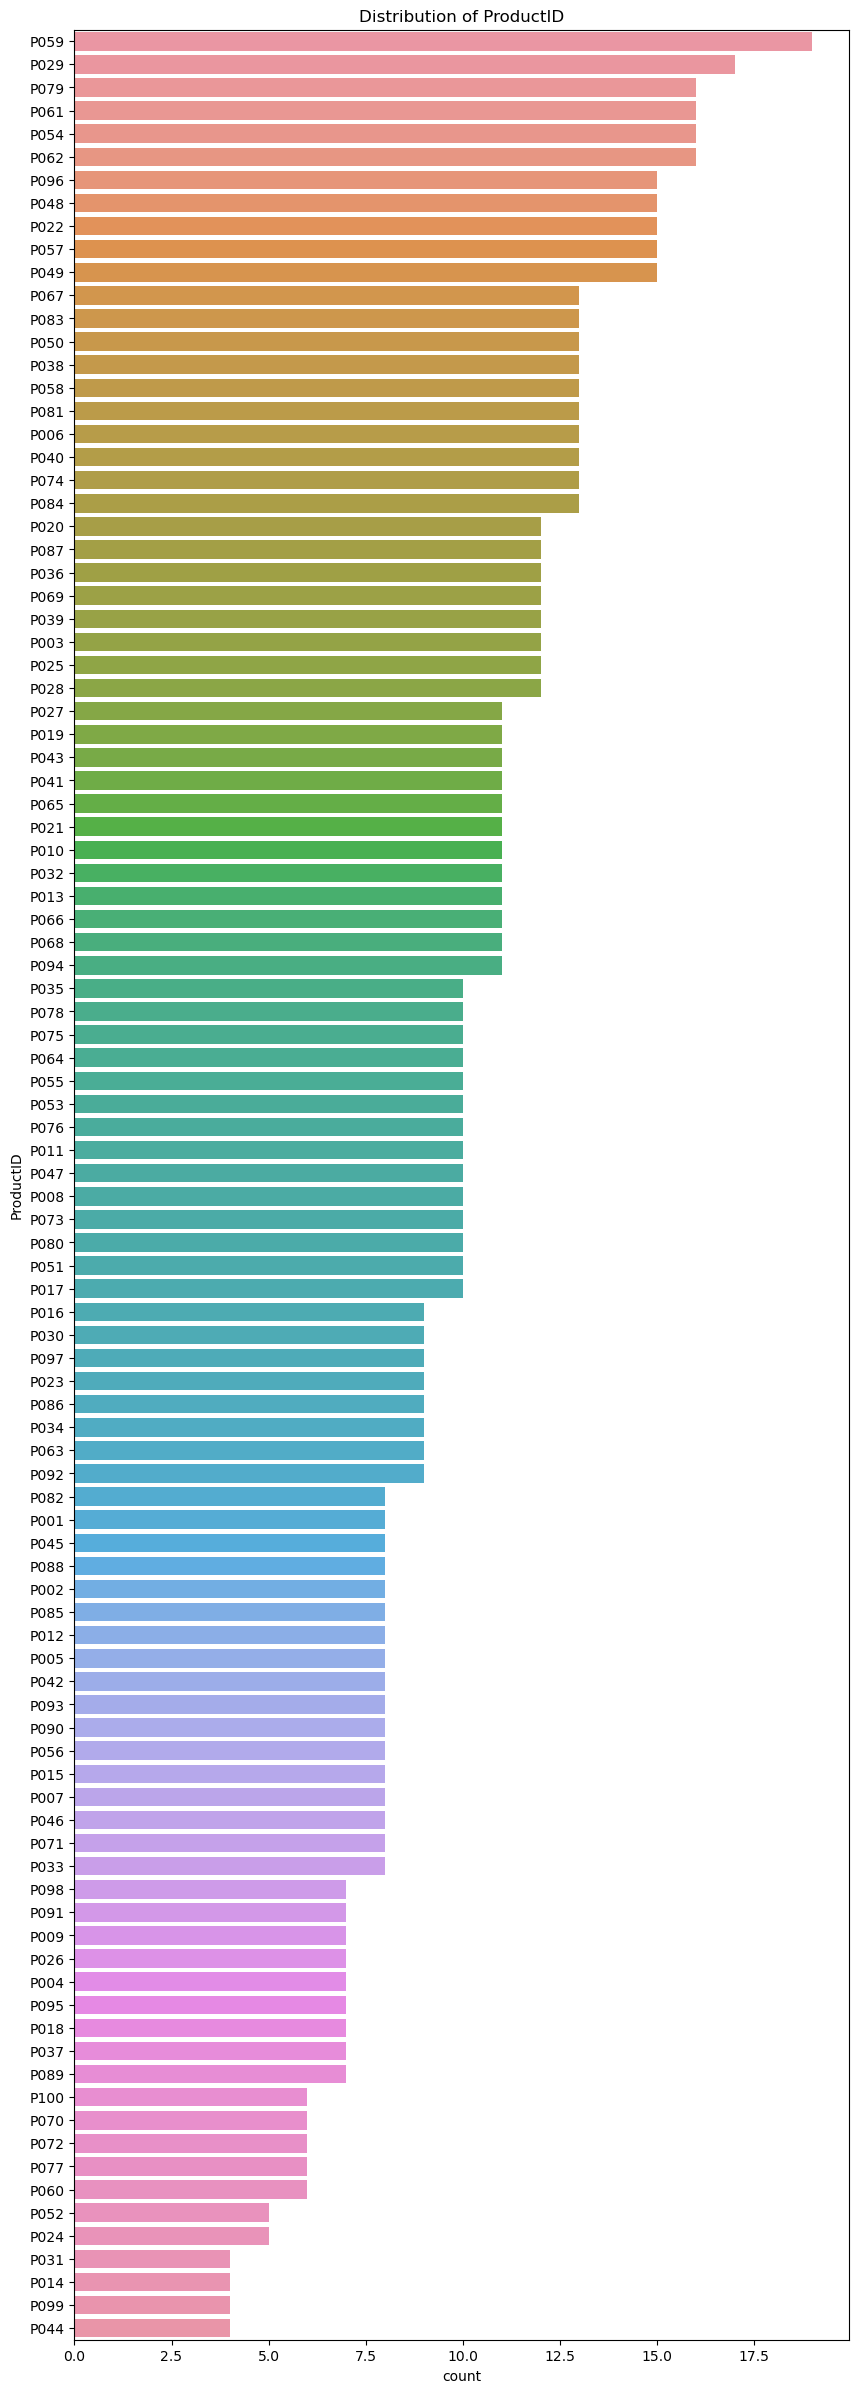

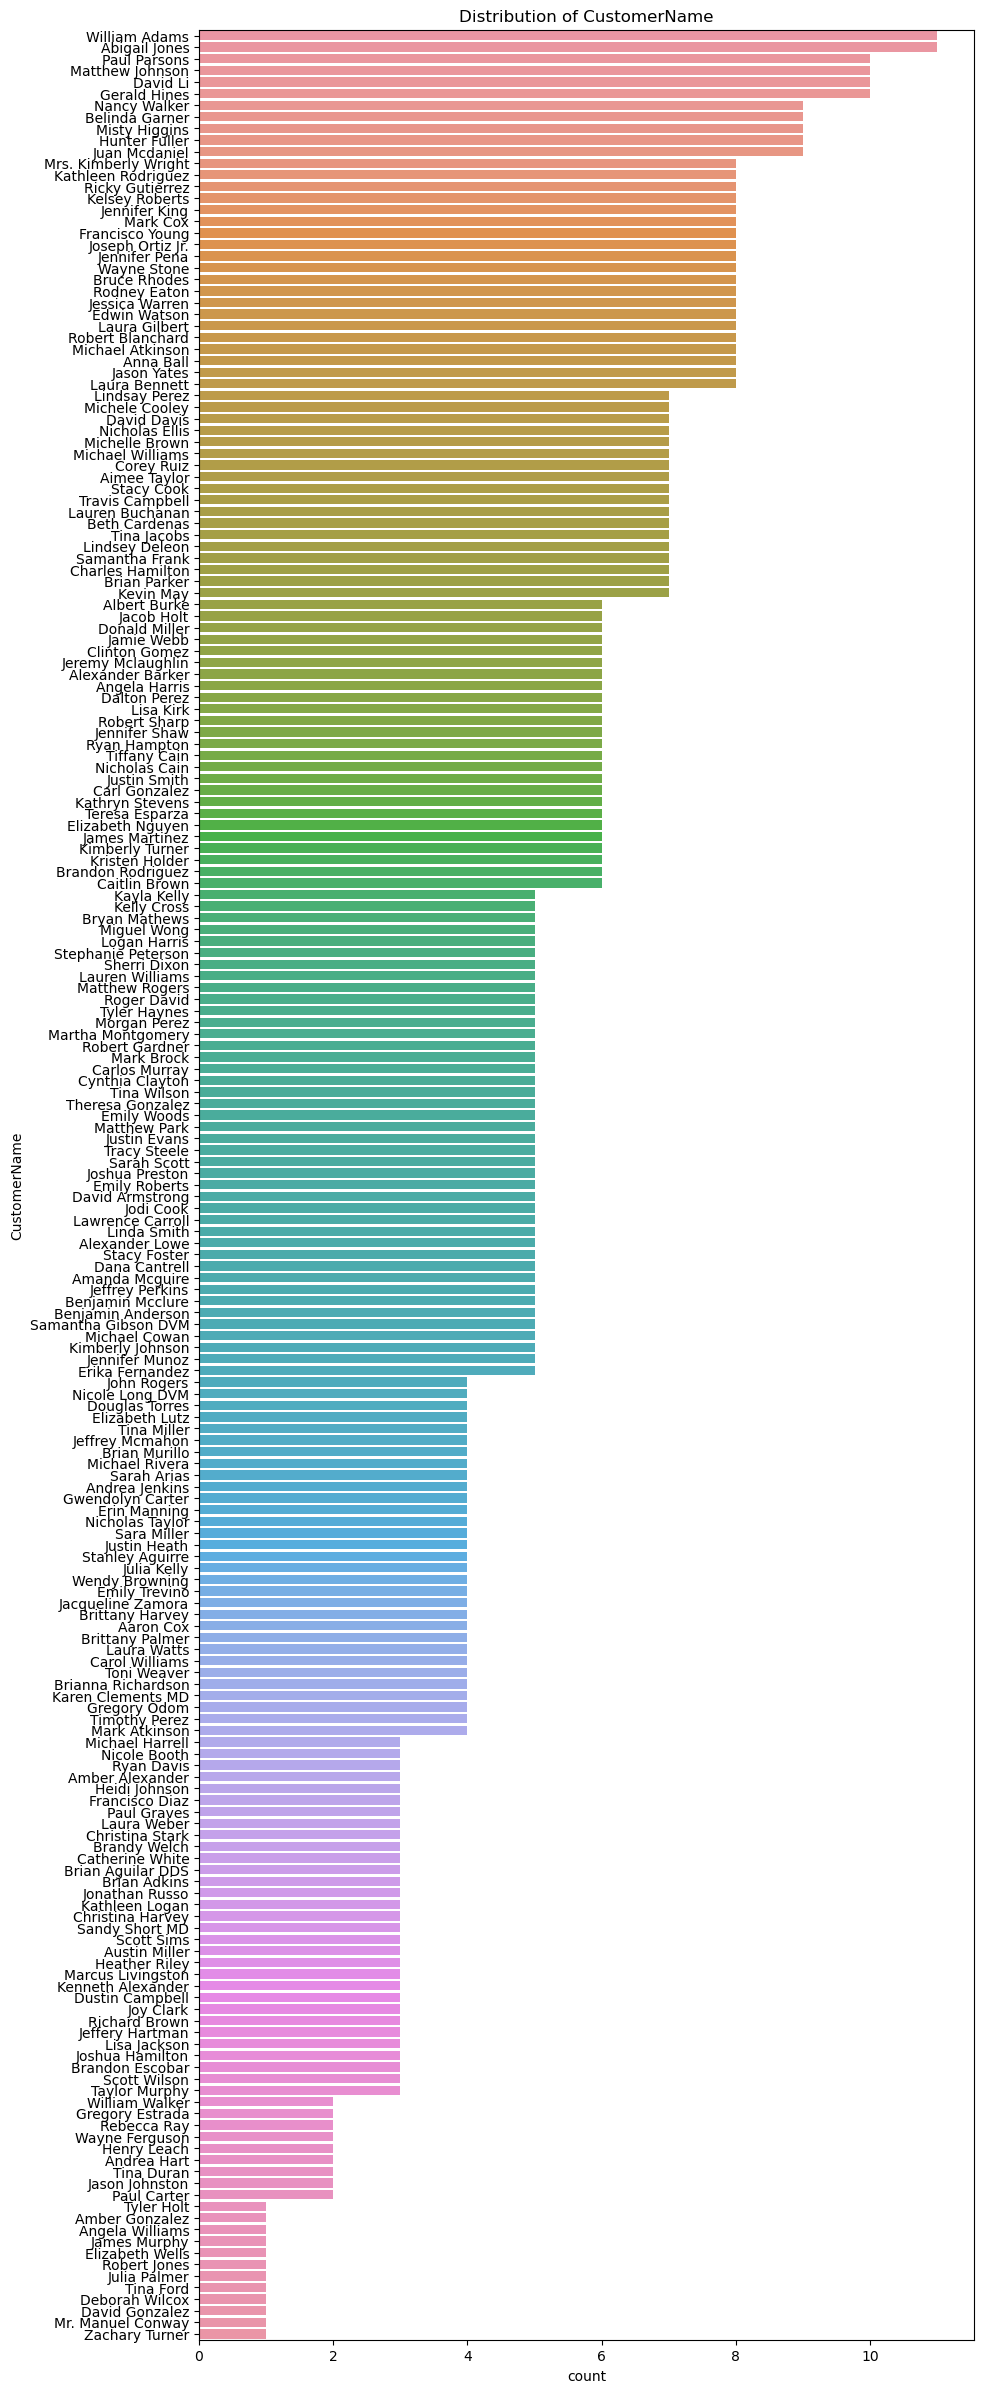

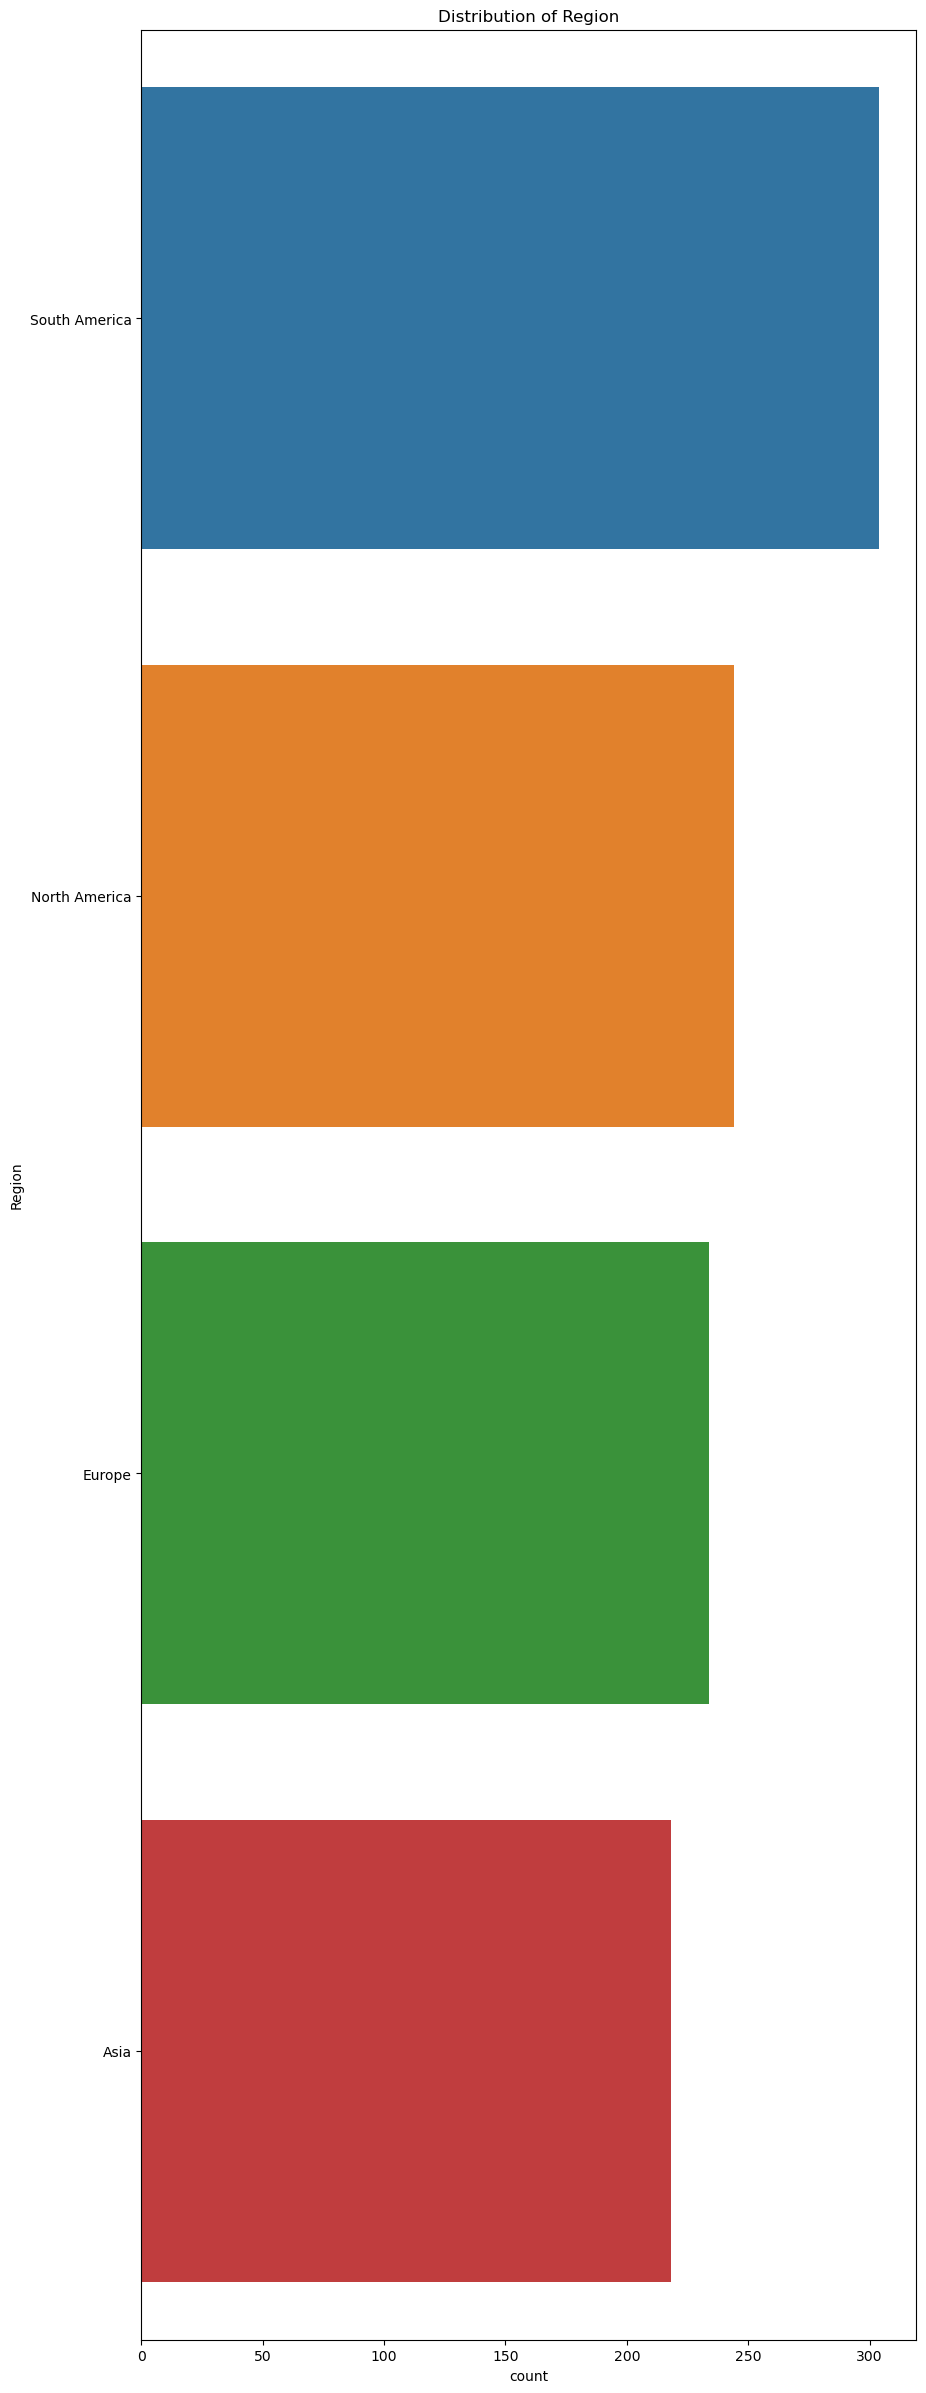

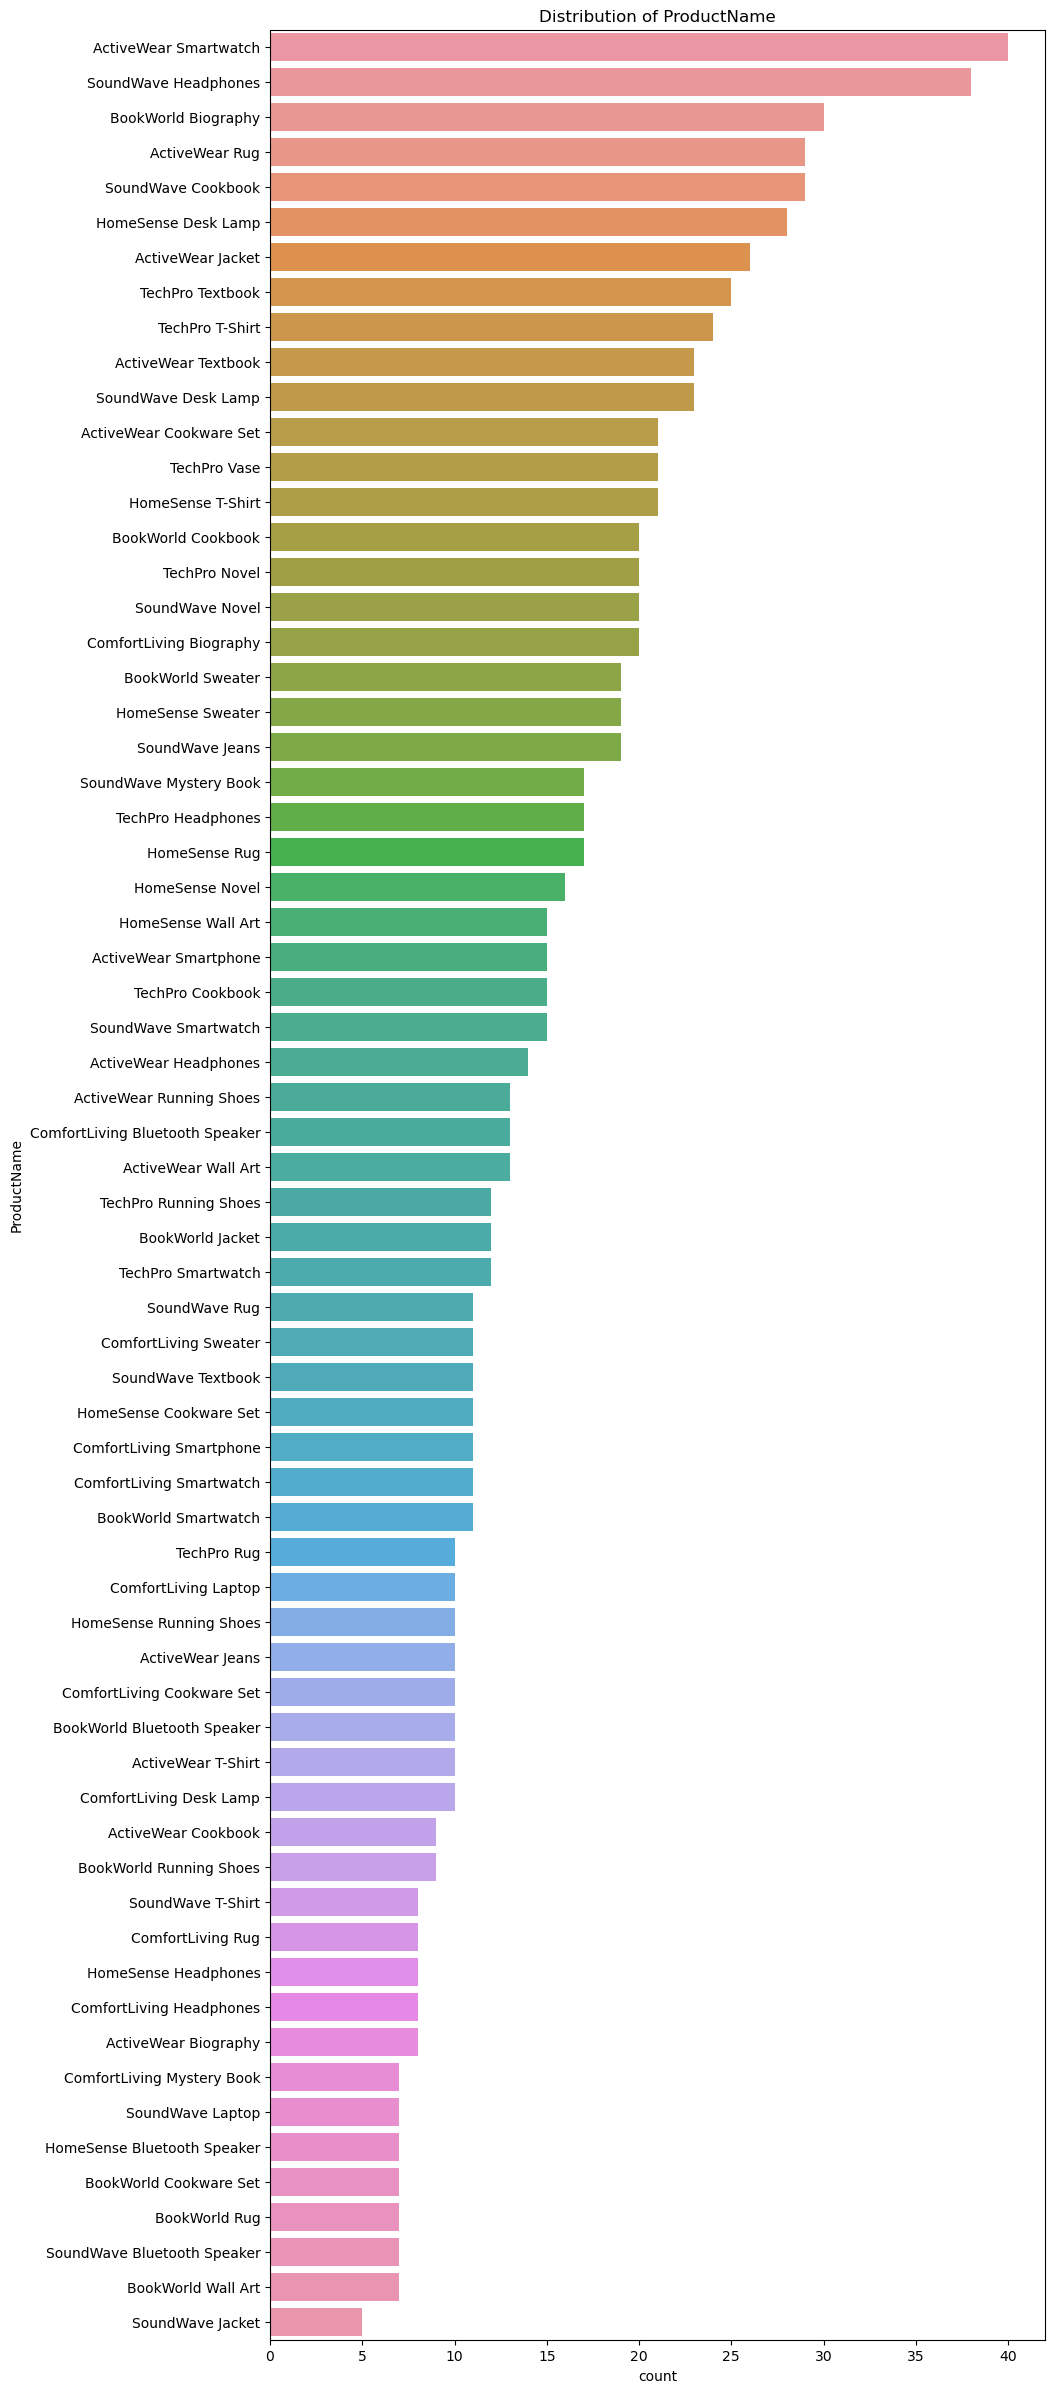

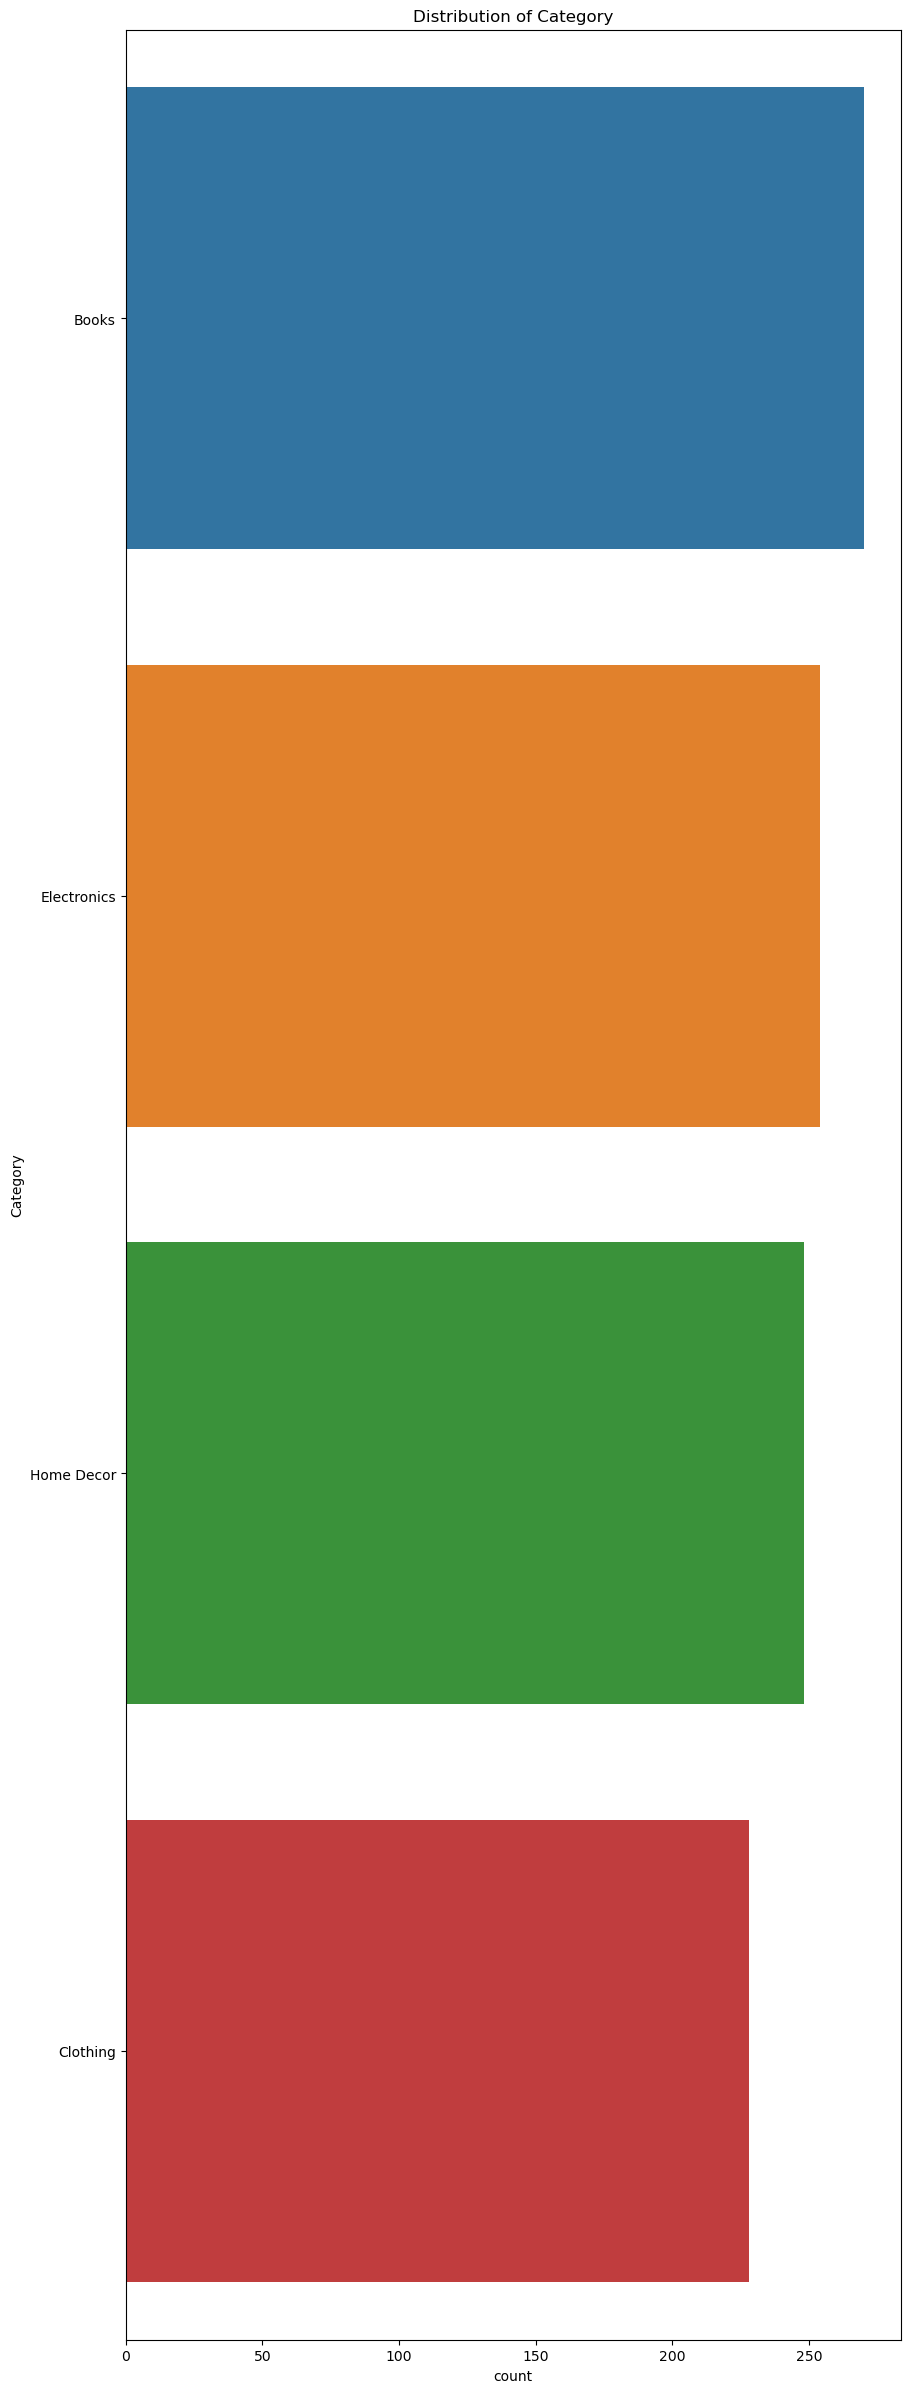

In [75]:
# Categorical variable distributions
categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 30))
    sns.countplot(y=merged_df[col], order=merged_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

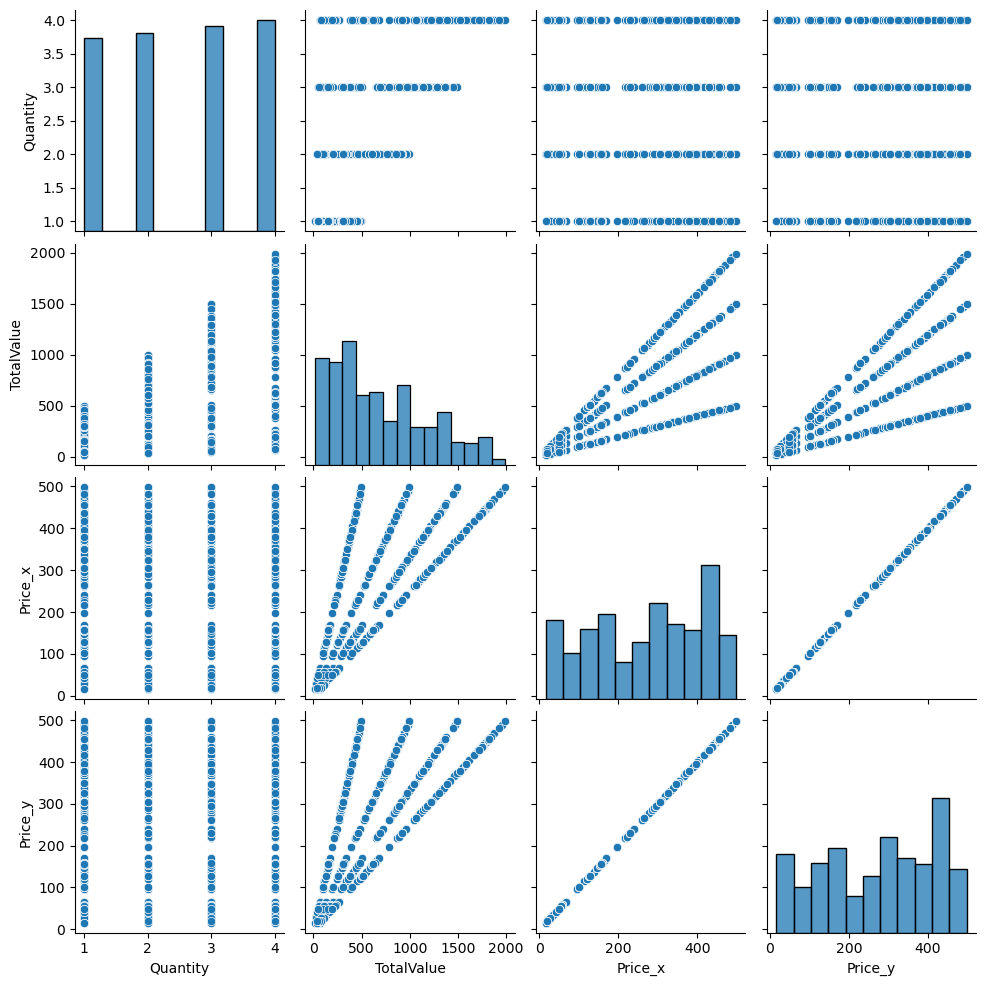

In [66]:
# Pairplot for key numerical features
sns.pairplot(merged_df.select_dtypes(include=['number']))
plt.show()

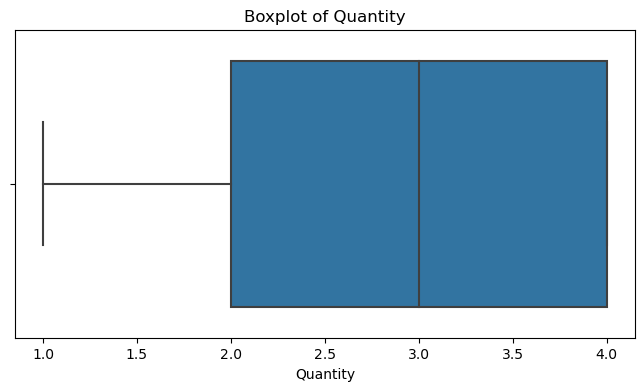

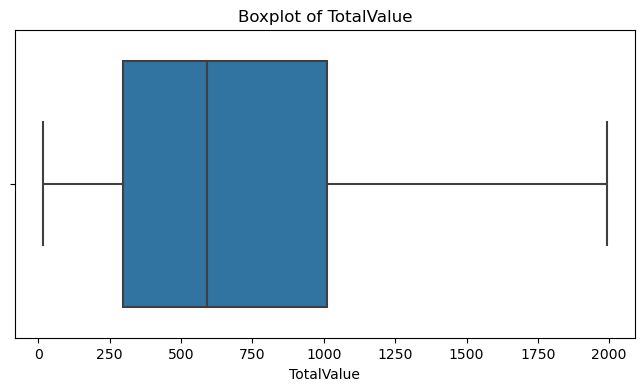

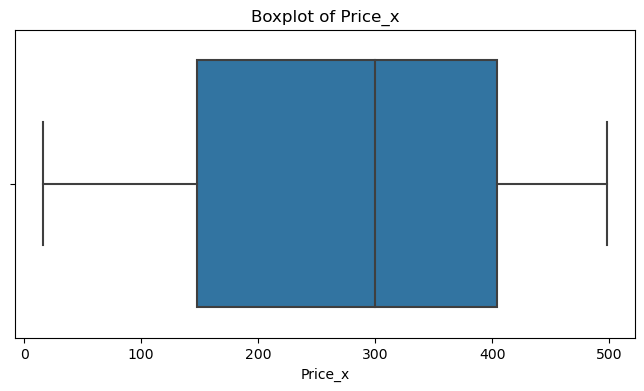

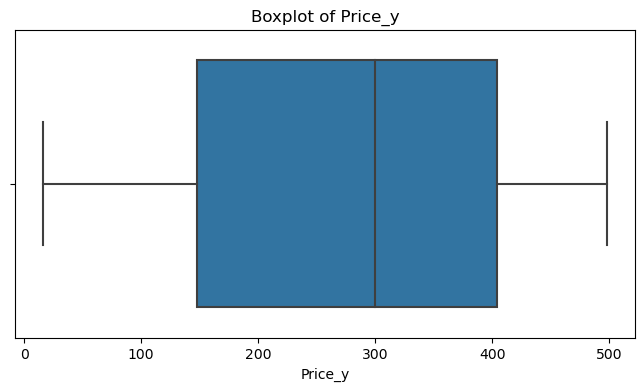

In [67]:
# Outlier detection using boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Key Business Insights

## 1. Top 5 customers by total spending

In [44]:
top_customers = transactionsDataFrame.groupby("CustomerID")["TotalValue"].sum().nlargest(5)
print("Top 5 Customers by Spending:\n", top_customers)

Top 5 Customers by Spending:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


## 2. Best-selling products

In [45]:
top_products = transactionsDataFrame.groupby("ProductID")["Quantity"].sum().nlargest(5)
print("Top 5 Best-Selling Products:\n", top_products)

Top 5 Best-Selling Products:
 ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
Name: Quantity, dtype: int64


## 3. Most popular product categories

In [46]:
popular_categories = transactionsDataFrame.merge(productsDataFrame, on="ProductID").groupby("Category")["Quantity"].sum().nlargest(5)
print("Most Popular Product Categories:\n", popular_categories)

Most Popular Product Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


## 4. Monthly revenue trends

In [48]:
monthly_revenue = transactionsDataFrame.groupby(transactionsDataFrame["TransactionDate"].dt.to_period("M")).agg({"TotalValue": "sum"})
print("Monthly Revenue Trends:\n", monthly_revenue)

Monthly Revenue Trends:
                  TotalValue
TransactionDate            
2023-12             3769.52
2024-01            66376.39
2024-02            51459.27
2024-03            47828.73
2024-04            57519.06
2024-05            64527.74
2024-06            48771.18
2024-07            71366.39
2024-08            63436.74
2024-09            70603.75
2024-10            47063.22
2024-11            38224.37
2024-12            59049.20


## 5. Average order value (AOV)

In [49]:
AOV = transactionsDataFrame["TotalValue"].sum() / transactionsDataFrame["TransactionID"].nunique()
print("Average Order Value:", AOV)

Average Order Value: 689.9955600000001


## 6. Regions contributing most to sales

In [50]:
regional_sales = transactionsDataFrame.merge(customerDataFrame, on="CustomerID").groupby("Region")["TotalValue"].sum().nlargest(5)
print("Regions Contributing Most to Sales:\n", regional_sales)

Regions Contributing Most to Sales:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


## 7. Customer retention - Number of repeat buyers

In [51]:
repeat_buyers = transactionsDataFrame["CustomerID"].value_counts()
num_repeat_buyers = (repeat_buyers > 1).sum()
print("Number of Repeat Buyers:", num_repeat_buyers)

Number of Repeat Buyers: 187


In [56]:
if "ProductID" not in transactionsDataFrame.columns:
    print("Error: 'ProductID' is missing from transactionsDataFrame")
if "ProductID" not in productsDataFrame.columns:
    print("Error: 'ProductID' is missing from productsDataFrame")
if "Price" not in productsDataFrame.columns:
    print("Error: 'Price' column is missing from productsDataFrame")


## 8. Price sensitivity - Average price of most frequently purchased products



In [61]:
merged_df = transactionsDataFrame.merge(productsDataFrame, on="ProductID", how="left")
merged_df.rename(columns={"Price_y": "ProductPrice", "Price_x": "TransactionPrice"}, inplace=True)
price_sensitivity = merged_df.groupby("ProductID").agg({"ProductPrice": "mean", "Quantity": "sum"}).nlargest(5, "Quantity")
print("Price Sensitivity of Most Purchased Products:\n", price_sensitivity)

Price Sensitivity of Most Purchased Products:
            ProductPrice  Quantity
ProductID                        
P054              57.30        46
P059             303.20        46
P029             433.64        45
P048             416.40        43
P057             239.70        43


## 9. Seasonal demand patterns

In [62]:
seasonal_demand = transactionsDataFrame.groupby(transactionsDataFrame["TransactionDate"].dt.month).agg({"TotalValue": "sum"})
print("Seasonal Demand Patterns:\n", seasonal_demand)

Seasonal Demand Patterns:
                  TotalValue
TransactionDate            
1                  66376.39
2                  51459.27
3                  47828.73
4                  57519.06
5                  64527.74
6                  48771.18
7                  71366.39
8                  63436.74
9                  70603.75
10                 47063.22
11                 38224.37
12                 62818.72


## 10. Most profitable products

In [63]:
most_profitable_products = transactionsDataFrame.groupby("ProductID").agg({"TotalValue": "sum"}).nlargest(5, "TotalValue")
print("Most Profitable Products:\n", most_profitable_products)

Most Profitable Products:
            TotalValue
ProductID            
P029         19513.80
P079         17946.91
P048         17905.20
P020         15060.92
P062         14592.24


# Key Business Insights

## 1. Top 5 Customers by Total Spending

- **Customer ID C0141**: $10,673.87
- **Customer ID C0054**: $8,040.39  
- **Customer ID C0065**: $7,663.70  
- **Customer ID C0156**: $7,634.45  
- **Customer ID C0082**: $7,572.91  

---

## 2. Best-Selling Products

- **Product ID P054**: 46 units  
- **Product ID P059**: 46 units  
- **Product ID P029**: 45 units  
- **Product ID P048**: 43 units  
- **Product ID P057**: 43 units  

---

## 3. Most Popular Product Categories

- **Books**: 681 units  
- **Home Decor**: 639 units  
- **Electronics**: 627 units  
- **Clothing**: 590 units  

---

## 4. Monthly Revenue Trends

- **Highest Revenue Month**: July 2024 ($71,366.39)  
- **Lowest Revenue Month**: December 2023 ($3,769.52)  

**Detailed Monthly Revenue:**
  - January 2024: $66,376.39  
  - February 2024: $51,459.27  
  - March 2024: $47,828.73  
  - April 2024: $57,519.06  
  - May 2024: $64,527.74  
  - June 2024: $48,771.18  
  - August 2024: $63,436.74  
  - September 2024: $70,603.75  
  - October 2024: $47,063.22  
  - November 2024: $38,224.37  
  - December 2024: $59,049.20  

---

## 5. Average Order Value (AOV)

- **AOV**: $689.99  

---

## 6. Regions Contributing Most to Sales

- **South America**: $219,352.56  
- **Europe**: $166,254.63  
- **North America**: $152,313.40  
- **Asia**: $152,074.97  

---

## 7. Customer Retention

- **Number of Repeat Buyers**: 187 customers  

---

## 8. Price Sensitivity - Average Price of Most Frequently Purchased Products

- **Product ID P054**: $57.30 (46 units)  
- **Product ID P059**: $303.20 (46 units)  
- **Product ID P029**: $433.64 (45 units)  
- **Product ID P048**: $416.40 (43 units)  
- **Product ID P057**: $239.70 (43 units)  

---

## 9. Seasonal Demand Patterns

- **Peak Demand Month**: July 2024 ($71,366.39)  
- **Other High-Demand Months**:  
  - September 2024 ($70,603.75)  
  - January 2024 ($66,376.39)  

- **Low Demand Month**: November 2024 ($38,224.37)  

---

## 10. Most Profitable Products

- **Product ID P029**: $19,513.80  
- **Product ID P079**: $17,946.91  
- **Product ID P048**: $17,905.20  
- **Product ID P020**: $15,060.92  
- **Product ID P062**: $14,592.24  
